### Imports

In [2]:
from IPython.display import Image, display

### Simple Web Service with database

The diagram below shows a simple web service with a single database server(data tier) and web server(web tier - to handle traffic). 

* User access websites through domain names such as `api.mysite.com`
* The IP (Internet Protocol) address is returned to browser or mobile app
* Once the IP is obtained, HTTP (Hypertext Transfer Protocol) requests are sent directly to your webserver
* The web server returns HTML pages or JSON response for rendering



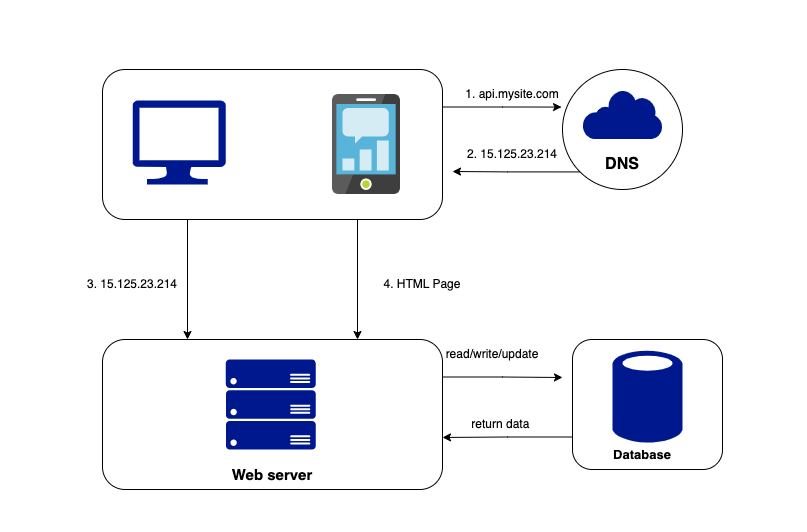

In [7]:
display(Image(filename='./diagrams/simple-web-service.png'))

**Why You should use NOSQL over SQL Databases**

* If your application requires super-low latency
* Your data are unstructured or you do not have any relational data
* You only need to serialize and deserialize (JSON, XML, YAML, etc.)
* You need to store a massive amount of data